Analise de Dados do Site PyMeet

Este site aprensenta profissionais da área da psicologia que trabalham com o valor social, por volta de R$30,00 a consulta.

In [1]:
from data.mysqls import BancoDeDados
import pandas as pd
import matplotlib.pyplot as plt
from utils.scraping import PsicologoScraper




Primeiro realizaremos o scraping de dados com o Selenium

In [2]:
PsicologoScraper().scrape()


Erro


In [9]:
BancoDeDados().transformar_json_em_sql()

In [10]:
def dataframe_estruturado(tabela: str):
    query_colunas = BancoDeDados().retornar_nomes_colunas(tabela)
    lista_colunas = []
    for coluna in query_colunas:
        lista_colunas.append(coluna[0])

    query_dados = BancoDeDados().retornar_dados(tabela)
    return pd.DataFrame(query_dados,columns=lista_colunas)

dados = dataframe_estruturado('psicologos')
sexo = dados['sexo'].value_counts()


In [11]:
dados

,id,nome,telefone,link,sexo
0,1,Mariana França,(61) 98284-6617,https://www.psymeetsocial.com/psicologo/marian...,F
1,2,Ana Laura Macabiba Lorena,(35) 99722-6446,https://www.psymeetsocial.com/psicologo/ana-la...,F
2,3,Cibele Giacomini,(47) 99978-3527,https://www.psymeetsocial.com/psicologo/cibele...,F
3,4,Francisco Elexandre Barboza de Freitas,(85) 98412-4774,https://www.psymeetsocial.com/psicologo/franci...,M
4,5,Felipe Sanberg Schuchmann,(51) 99664-5881,https://www.psymeetsocial.com/psicologo/felipe...,M
...,...,...,...,...,...
795,796,Daiene Pimentel da Cunha Gandra Pereira,(17) 98130-0188,https://www.psymeetsocial.com/psicologo/daiene...,F
796,797,Ana Cristina dos Santos Souza Diniz,(86) 98170-2473,https://www.psymeetsocial.com/psicologo/ana-cr...,F
797,798,Maria Caroline Oliveira Lopes Miranda,(86) 92001-8062,https://www.psymeetsocial.com/psicologo/maria-...,F
798,799,Grasiele Moniz Mendonça,(11) 91266-5478,https://www.psymeetsocial.com/psicologo/grasie...,F


Quando falamos de psicologos, na maioria das vezes pensamos logo em uma profissional do sexo feminino.
Sendo bem perceptível isso quando analizamos o grafico comparando a quantidade de psicologos achados no site PsyMeet

sexo
F    602
M    198
Name: count, dtype: int64


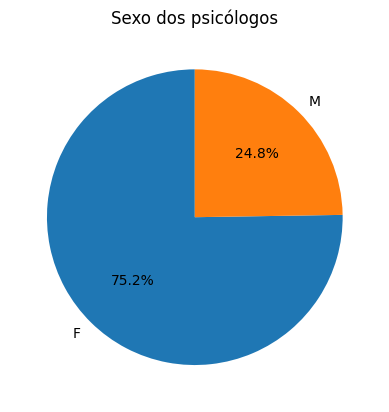

In [18]:
plt.pie(sexo, labels=sexo.index, autopct='%1.1f%%', startangle=90)
plt.title('Sexo dos psicólogos')
print(sexo)

Foi seguindo essa tendência que surgiram algumas matérias sobre esse tema, como os seguintes sites:

1)https://amenteemaravilhosa.com.br/mais-mulheres-psicologas/
2)http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1414-98931984000100002
3)https://crprn.org.br/noticias/psicologia-uma-profissao-de-muitas-e-diferentes-mulheres/


In [13]:
#quero que obternha os dados de todos os psicologos que o telefone que tenha (83)
data = []
for psi in dados['telefone']:
    if psi[1:3] == '83':
        data.append(psi)
print(dados[dados['telefone'].isin(data)])

      id                                 nome         telefone  \
22    23         Angelina Vasconcelos Fragoso  (83) 98661-5224   
33    34                  Valeska Gomes Nunes  (83) 99910-2621   
112  113                 Ícaro da Silva Gomes  (83) 99104-4076   
126  127           Mylena Kelly Lima da Silva  (83) 99881-8003   
152  153    Paula Gonçalves Vitorino Monteiro  (83) 99865-0376   
289  290                 Vitória Cruz Cardoso  (83) 99699-5658   
489  490             Luciana Cunha Cavalcanti  (83) 98684-1366   
608  609  Raphaella Renally Fernandes Tavares  (83) 98898-9290   
767  768                Camila Spósito Guenze  (83) 98793-3813   
770  771          Paloma Lemos de Campos Juca  (83) 99889-6263   

                                                  link sexo  
22   https://www.psymeetsocial.com/psicologo/angeli...    F  
33   https://www.psymeetsocial.com/psicologo/valesk...    F  
112  https://www.psymeetsocial.com/psicologo/icaro-...    M  
126  https://www.psymeets

([<matplotlib.patches.Wedge at 0x16dd53beb10>,
 [Text(-0.8633500945555365, 0.6816352501381854, 'Nordeste'),
  Text(-1.045162746105444, -0.3429793494560966, 'Norte'),
  Text(-0.9138705593099814, -0.612242272982242, 'Sul'),
  Text(0.9048130613338968, -0.6255504168646857, 'Sudeste'),
  Text(0.22905270045537435, 1.0758879404538841, 'Centro-Oeste')],
 [Text(-0.4709182333939289, 0.37180104552991927, '28.7%'),
  Text(-0.5700887706029695, -0.18707964515787087, '2.6%'),
  Text(-0.49847485053271706, -0.3339503307175865, '6.1%'),
  Text(0.4935343970912164, -0.34120931828982853, '55.9%'),
  Text(0.12493783661202236, 0.5868479675203004, '6.7%')])

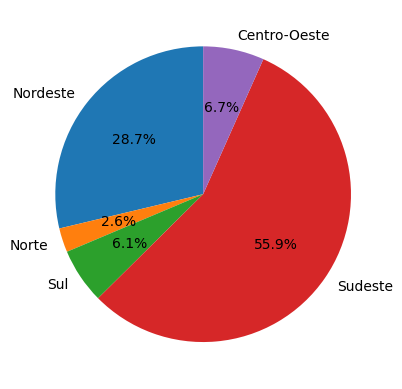

In [14]:
data = [] 
for psi in dados['telefone']:
    data.append(psi[1:3])

dados['ddd'] = data
m = dados

regioes = {'Nordeste': ['81', '82', '83', '84', '85', '86', '87', '88', '89', '71', '73', '74', '75', '77', '79'],
           'Norte': ['91', '92', '93', '94', '95', '96', '97', '98', '99'],
           'Sul': ['41', '42', '43', '44', '45', '46', '47', '48', '49'],
           'Sudeste': ['11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '24', '27', '28'],
           'Centro-Oeste': ['61', '62', '63', '64', '65']}
x = [m[m['ddd'].isin(v)]['ddd'].count() for k, v in regioes.items()]
plt.pie(x, labels=regioes.keys(), autopct='%1.1f%%', startangle=90)



In [17]:
#mostrar todas as psicologas do sexo F que tem sao da regiao nordeste
x = m[(m['sexo'] == 'F') & (m['ddd'].isin(regioes['Nordeste']) )]
#csv
x.to_csv('psicologas_nordeste.csv', index=False)


